In [18]:
import sys
import os
sys.path.append('/root/capsule/code/beh_ephys_analysis')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils.beh_functions import *
from aind_dynamic_foraging_data_utils.nwb_utils import load_nwb_from_filename
from aind_dynamic_foraging_basic_analysis.plot.plot_foraging_session import plot_foraging_session
from opto_tagging import opto_plotting_session
import pickle
import spikeinterface as si
%matplotlib inline

In [19]:
session = 'behavior_758017_2025-02-04_11-57-38'
data_type = 'raw'
target = 'soma'

In [24]:
session_dir = session_dirs(session)
opto_tagging_csv_dir = os.path.join(session_dir[f'opto_dir_{data_type}'], f'{session}_opto_tagging_metrics.csv') 
opto_tagging_df = pd.read_csv(opto_tagging_csv_dir)

In [25]:
# load spike times
with open(os.path.join(session_dir[f'ephys_processed_dir_{data_type}'], 'spiketimes.pkl'), 'rb') as f:
    spiketimes = pickle.load(f)
start = np.min(np.array([np.min(spiketimes[unit]) for unit in spiketimes.keys()]))
end = np.max(np.array([np.max(spiketimes[unit]) for unit in spiketimes.keys()]))
start, end

(3974340.384762423, 3978170.0082818666)

In [6]:
we = si.load_sorting_analyzer_or_waveforms(session_dir[f'postprocessed_dir_{data_type}'])
spike_amplitude = we.load_extension('spike_amplitudes').get_data(outputs="by_unit")[0]

In [33]:
spike_mean_time = [np.mean(spiketimes[unit]) if len(spiketimes[unit]) > 0 else 0 for unit in spiketimes.keys() if len(spiketimes[unit]) > 0]
sort_ind = np.argsort(spike_mean_time)

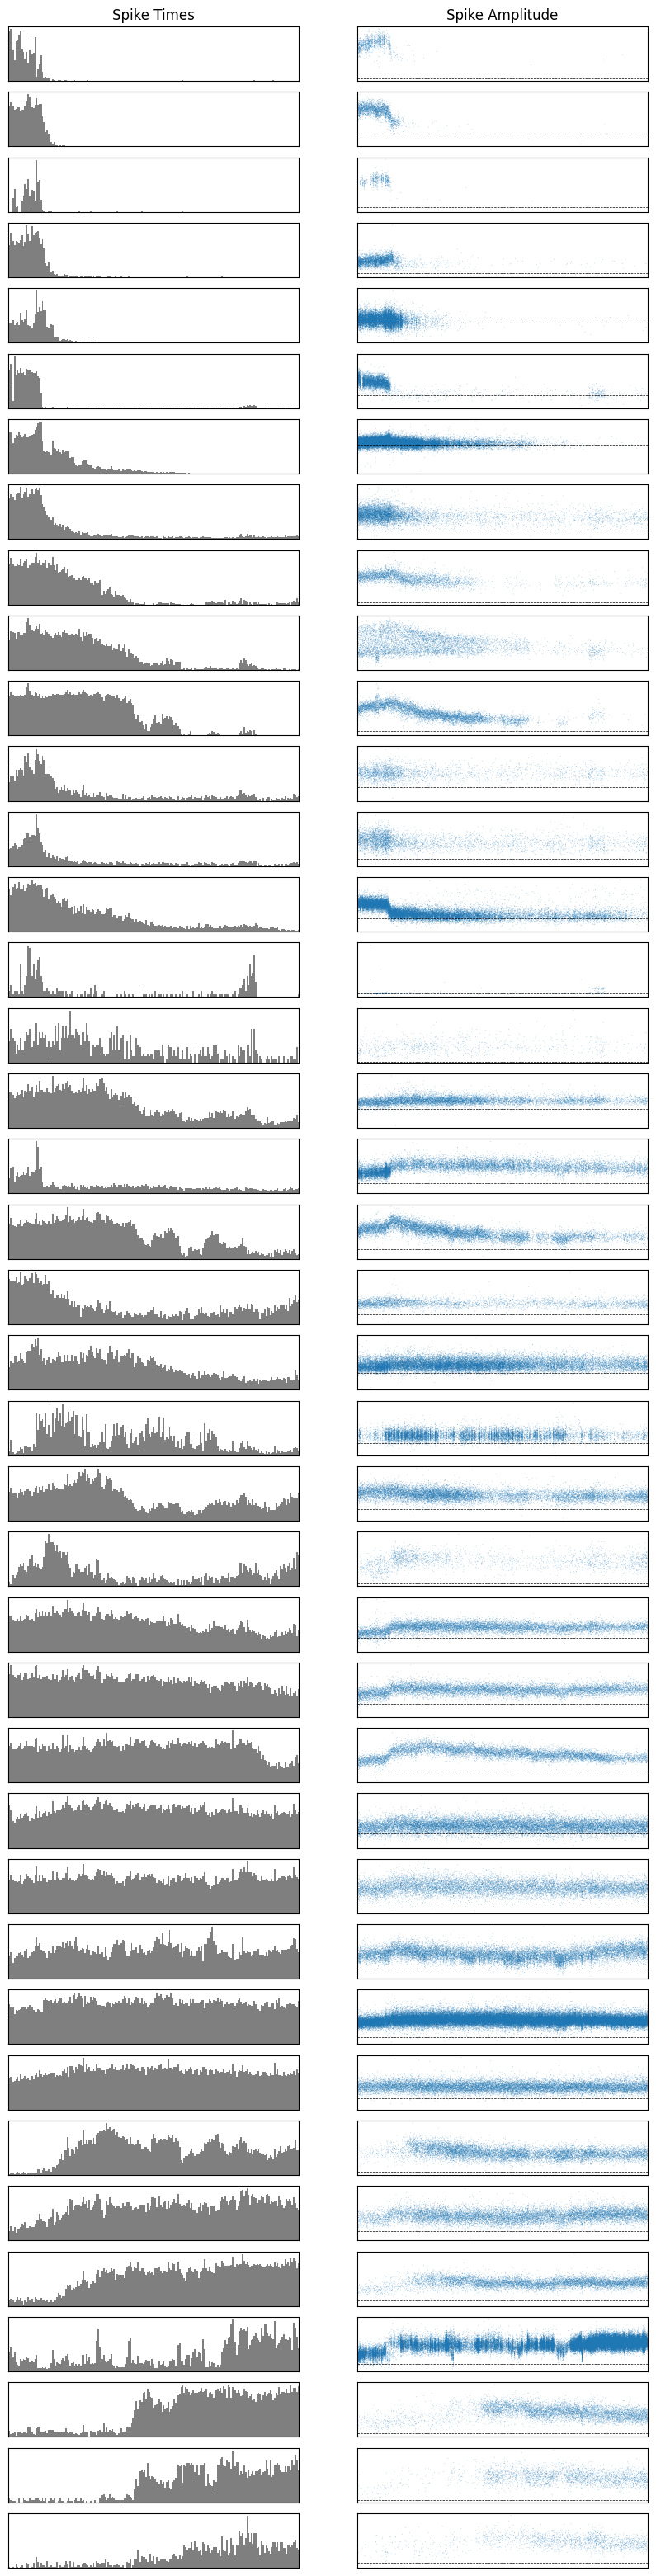

In [35]:
fig, ax = plt.subplots(np.sum(opto_tagging_df['opto_pass'].values), 2, figsize=(10, 40))
opto_tagging_df_sorted = opto_tagging_df.iloc[sort_ind].copy()
opto_tagging_df_focus = opto_tagging_df_sorted[opto_tagging_df_sorted['opto_pass'] == True].copy()
# reset index
opto_tagging_df_focus.reset_index(drop=True, inplace=True)
bins = np.linspace(start, end, 200)
for i, row in opto_tagging_df_focus.iterrows():
    ax[i, 1].scatter(spiketimes[row['unit_id']], -spike_amplitude[row['unit_id']], s=0.3, alpha = 0.5, edgecolor ='none')
    ax[i, 1].axhline(y=0, color='k', linestyle='--', linewidth=0.5)
    if i==0:
        ax[i, 1].set_title('Spike Amplitude')
    
    # turn off ticks
    ax[i, 1].set_xticks([])
    ax[i, 1].set_yticks([])
    ax[i, 1].set_xlim(start, end)
    
    ax[i, 0].hist(spiketimes[row['unit_id']], bins=bins, color='k', alpha=0.5, label='Spike Times')
    if i==0:
        ax[i, 0].set_title('Spike Times')
    # turn off ticks
    ax[i, 0].set_xticks([])
    ax[i, 0].set_yticks([])
    ax[i, 0].set_xlim(start, end)
plt.show(block=True)
fig.savefig(fname=os.path.join(session_dir[f'opto_dir_{data_type}'], f'{session}_opto_tagged_spike_times.pdf'))

In [10]:
plt.scatter(spiketimes[0], spike_amplitude[0], s=1)
plt.show()

In [9]:
spike_amplitude[0]

array([-64.935   , -42.12    , -70.784996, ..., -19.89    , -30.42    ,
       -14.039999], dtype=float32)